In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

In [2]:
print("here")
df = pd.read_pickle('./modified_data/value_30.pkl')
print(df.head())

here
                                       Filename  index  \
0  ./data/new_dataset/parkinson/H_P000-0001.txt      0   
1  ./data/new_dataset/parkinson/H_P000-0001.txt      0   
2  ./data/new_dataset/parkinson/H_P000-0001.txt      0   
3  ./data/new_dataset/parkinson/H_P000-0001.txt      0   
4  ./data/new_dataset/parkinson/H_P000-0001.txt      0   

                                     X                                    y  
0                              [200.0]                              [204.0]  
1                       [200.0, 200.0]                       [204.0, 204.0]  
2                [200.0, 200.0, 200.0]                [204.0, 204.0, 204.0]  
3         [200.0, 200.0, 200.0, 200.0]         [204.0, 204.0, 204.0, 204.0]  
4  [200.0, 200.0, 200.0, 200.0, 200.0]  [204.0, 204.0, 204.0, 204.0, 204.0]  


In [24]:
def display_random(num = 4):
    random_rows = df.sample(n=num)
    x_values = random_rows['X'].apply(np.array)
    y_values = random_rows['y'].apply(np.array)
    print(x_values)
    print(y_values)
    fig, axes = plt.subplots(1, num, figsize=(24,4))
    for i, ax in enumerate(axes):
        x = x_values.iloc[i]
        y = y_values.iloc[i]
        combined_array = np.column_stack((x, y))
        print("initial")
        print(combined_array[:,:])
        angle = 90
        theta = np.radians(angle)  # Convert the angle to radians

        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                                    [np.sin(theta), np.cos(theta)]])

        rotated = np.dot(combined_array, rotation_matrix)
        print("Final")
        print(rotated[:,:])
        
        rotated = np.rot90(combined_array, k=1)
        print("final")
        print(rotated[:,:])
        ax.scatter(rotated[:,0], rotated[:,1], marker='o')
        ax.set_title(f'Sample {i+1}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

52246     [198.99932249322495, 198.99932249322495, 198.9...
50797     [198.99932249322495, 198.99932249322495, 198.9...
98291     [198.99932249322495, 198.99932249322495, 200.0...
138548    [201.00067750677508, 202.00135501355015, 201.0...
Name: X, dtype: object
52246     [203.0, 203.0, 203.0, 203.0, 203.0, 203.0, 204...
50797     [203.0, 203.0, 203.0, 203.0, 203.0, 203.0, 204...
98291     [205.0, 205.0, 205.0, 204.0, 204.0, 204.0, 204...
138548    [204.0, 204.0, 205.0, 205.0, 205.0, 206.0, 206...
Name: y, dtype: object
initial
[[198.99932249 203.        ]
 [198.99932249 203.        ]
 [198.99932249 203.        ]
 ...
 [121.94715447 156.        ]
 [121.94715447 156.        ]
 [120.94647696 157.        ]]
final
[[203.         203.         203.         ... 156.         156.
  157.        ]
 [198.99932249 198.99932249 198.99932249 ... 121.94715447 121.94715447
  120.94647696]]
initial
[[198.99932249 203.        ]
 [198.99932249 203.        ]
 [198.99932249 203.        ]
 [198.99932249 203

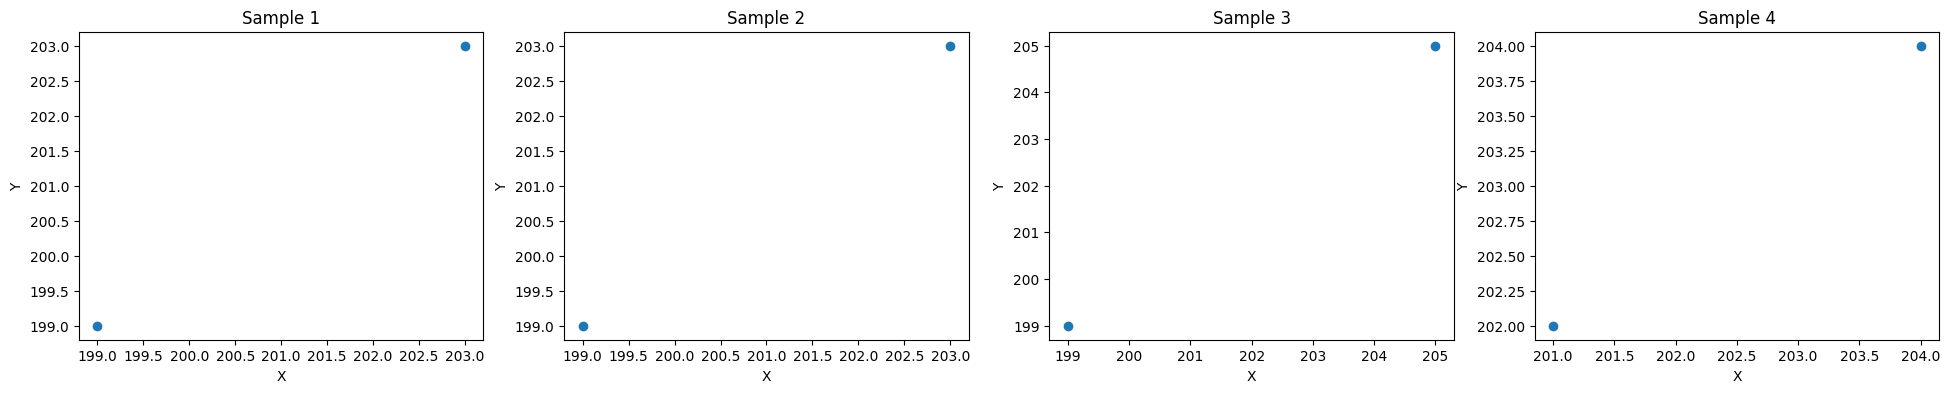

In [25]:
display_random()